In [6]:
#importer notre données de l'experience 
import pandas as pd
data = pd.read_csv('data.csv')
data['temps'] = pd.to_datetime(data.temps)
data['temps'] = 60*data.temps.dt.hour  + data.temps.dt.minute  + (1/60)*data.temps.dt.second
data.head()

,temps,température (Celsius)
0,3.083333,27.0
1,6.000000,28.5
2,9.166667,30.0
3,12.250000,31.0
4,15.300000,32.5


la fonction de prédiction est de la forme 
$g(t)=A(1-e^{t/\tau})+b$


In [7]:
def g(t,a,tau,b):
    return a*(1-np.exp(-(t)/tau))+b
    

***note:*** le but est d'optimiser cette fonction c'est à dire obtenir les meilleurs coefficients $c_0$, $c_1$,$c_2$ et $c_4$ , en utilisant scipy.optimize.curve_fit

In [10]:
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt

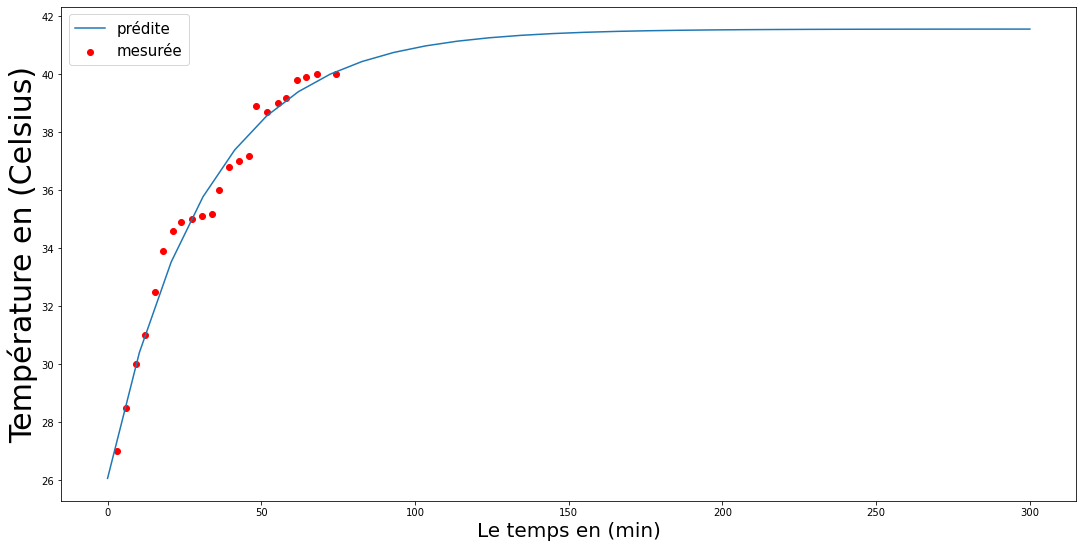

In [11]:
# les parametres du graphes #
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(222)
plt.xlabel('Le temps en (min)', size = 20)
plt.ylabel('Température en (Celsius)', size = 30)
# stockage des données de l'experiece dans t (temps) et temp (temperature) #
t=data['temps'].values
temp=data['température (Celsius)'].values
# tracer les données reelles sous forme des points rouges
ax.scatter(t,temp,color='red',label='mesurée')
# optimiser la fonction prédictive
c,cov = curve_fit(g,t,temp)
# tracer la fonction prédictive
tt = np.linspace(0,300,30)
ax.plot(tt,g(tt,c[0],c[1],c[2]),label='prédite')
plt.legend(loc=0,prop={'size': 15})
